# Part I: Segmentation

In [1]:
%cd E:\22FALL\AD654\Assgn\AssngII
import pandas as pd
rfm = pd.read_csv("lobster_club_rfm.csv") 

E:\22FALL\AD654\Assgn\AssngII


### A. Drop the courseID variable.

In [2]:
rfm = rfm.drop('customerID', 1)
rfm

C:\Users\ranfe\AppData\Local\Temp/ipykernel_2992/1456561029.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  rfm = rfm.drop('customerID', 1)


,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
0,27,21,35,25,90.73,54.88
1,29,12,25,13,112.33,76.44
2,18,5,45,42,67.85,49.11
3,31,18,33,34,107.51,86.25
4,20,20,27,21,109.98,80.86
...,...,...,...,...,...,...
649,22,22,43,38,57.98,11.99
650,24,2,36,24,113.52,70.43
651,22,18,35,26,91.32,52.62
652,37,37,32,28,56.78,24.70


a. Why will customerID not be relevant in a clustering model?

Answer: The principle for cluster is to maximize the between-cluster variance while minimizing the within cluster variance. One of the common way is to calculate the Euclidean distance by summing each of their pairwise squared differences, and then taking the square root of that sum. So the unique and ordered customerID that is just for easily tracked will not help when we calculate the Euclidean distance.

### B.Call the describe() function on your dataset.

In [3]:
rfm.describe()

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,27.108563,18.940367,32.619266,25.403670,72.192722,42.947691
std,7.482424,11.788896,6.254946,7.169724,21.354962,23.231503
min,8.000000,0.000000,8.000000,1.000000,11.820000,-17.250000
25%,22.000000,10.000000,29.000000,21.000000,57.495000,27.375000
50%,26.000000,18.000000,33.000000,26.000000,71.860000,42.565000
75%,31.000000,26.000000,37.000000,30.000000,86.485000,58.767500
max,60.000000,60.000000,52.000000,48.000000,137.720000,122.390000


a. How does this function help you to gain an overall sense of the columns and values in this (or any other) dataset? Why is this valuable for any analyst who will use a dataset to build a model?

Answer: The describe function returns descriptive statistics of our data that can help us have the first data-oriented impression. By doing so, with simplifying the description, we can have a general impression of the distribution of each variable and may also identify the outliers/missing values/impossible values. For example, the minimus total_dollars_other is negative, which doesn't match common sense.

### C.Missing values/impossible values

In [4]:
print(rfm.isnull().sum())

days_since_purch        0
days_since_sitevisit    0
total_visits_yr         0
total_purch_yr          0
total_dollars_yr        0
total_dollars_other     0
dtype: int64


a. Does this dataset contain any missing values? If so, how many? Which
columns have missing values?

Answer: The dataset does not contain any missing value.

In [5]:
print(rfm.loc[rfm['total_dollars_other'] < 0 ])

     days_since_purch  days_since_sitevisit  total_visits_yr  total_purch_yr  \
71                 30                    28               30              28   
96                 27                    15               31              23   
103                15                     5               39              39   
105                39                    39               34              29   
164                30                    30               28              19   
182                44                    44               26              25   
184                31                    31               28              25   
218                22                     2               44              34   
240                21                     8               41              34   
256                23                    21               30              25   
264                31                    21               33              28   
278                25                   

In [6]:
rfm['total_dollars_other'] = rfm['total_dollars_other'].abs()
# check
# print(rfm.loc[rfm['total_dollars_other'] < 0 ])
# rfm.describe()

b. What about impossible values? Do you see any impossible values here?
If so, handle them in any way that you see fit. Why did you take this
approach?

Answer: Based on the decribe() result shown before, I found out there exists a negative value in "total_dollar_others" which is not make common sense. Then I check this column and detect other impossible values come for the same reason. So I use the abs() function to turn these negative values into positive ones, I assume that the value itself is correct, just the sign goes wrong.

### D.Data scaling.

a. Do your variables need to be standardized? Why or why not?

Answer: I think the variables need to be standardized because there are variables that describe money matter, while others describe time matter. To calculate the Euclidean distance for the clustering method, we need to standardize these variables to avoid the high-ranges-variables will have a bigger influence on the clustering.


b. If your data requires standardization, use Python to convert your values
into z-scores, and store the normalized data in a new dataframe. If not,
proceed to the next step without changing the variables.

In [7]:
from sklearn.preprocessing import StandardScaler 

data_scaling = StandardScaler()
data_scaling.fit(rfm)

rfm_normalize = data_scaling.transform(rfm)
rfm_normalize = pd.DataFrame(data = rfm_normalize, index = rfm.index , columns = rfm.columns)
print(rfm_normalize.describe().round(2))

       days_since_purch  days_since_sitevisit  total_visits_yr  \
count            654.00                654.00           654.00   
mean              -0.00                 -0.00             0.00   
std                1.00                  1.00             1.00   
min               -2.56                 -1.61            -3.94   
25%               -0.68                 -0.76            -0.58   
50%               -0.15                 -0.08             0.06   
75%                0.52                  0.60             0.70   
max                4.40                  3.49             3.10   

       total_purch_yr  total_dollars_yr  total_dollars_other  
count          654.00            654.00               654.00  
mean             0.00             -0.00                -0.00  
std              1.00              1.00                 1.00  
min             -3.41             -2.83                -1.95  
25%             -0.61             -0.69                -0.72  
50%              0.08      

### E. Elbow chart.

a. Build an elbow chart to help give you a sense of how you might build
your model.

D:\app\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


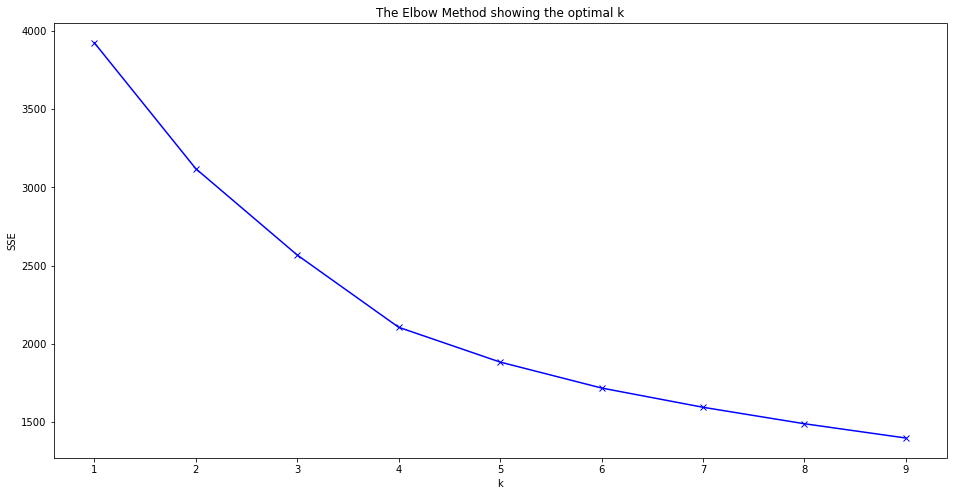

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=654)
    kmeanModel.fit(rfm_normalize)
    distortions.append(kmeanModel.inertia_)
    
# Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show() 

### F. How many clusters will you use for your k-means model? 

Answer: Accroding to the elbow char, I will choose 4 as the number of my cluster. Since after k=4, the reduction of SSE becomes slow.

### G. Build a k-means model with your desired number of clusters.

In [9]:
kmeans = KMeans(n_clusters=4, random_state=654) 
kmeans.fit(rfm_normalize)

KMeans(n_clusters=4, random_state=654)

### H. Generate and show summary statistics about each of your clusters.

In [10]:
labels = kmeans.labels_

rfm_normalize_cluster = rfm_normalize.assign(Cluster = labels)
grouped = rfm_normalize_cluster.groupby(['Cluster'])

grouped.agg({ 
    'days_since_purch': 'mean',
    'days_since_sitevisit': 'mean', 
    'total_visits_yr': 'mean',
    'total_purch_yr': 'mean', 
    'total_dollars_yr': 'mean', 
    'total_dollars_other': 'mean'}).round(2)

,days_since_purch,days_since_sitevisit,total_visits_yr,total_purch_yr,total_dollars_yr,total_dollars_other
Cluster,,,,,,
0,1.48,1.50,-0.14,-0.12,-0.04,-0.06
1,-0.36,-0.35,-0.86,-0.93,-0.33,-0.35
2,-0.26,-0.24,0.28,0.30,1.09,1.14
3,-0.33,-0.38,0.81,0.85,-0.64,-0.64


### I. Build any four simple visualizations to help management better understand your clusters

(a simple visualization could be a histogram, a barplot, a scatterplot, etc. – it should show original variables from the dataset) You may wish to facet your visualizations by cluster.
For each one of your visualizations, include 2-3 sentences of description/
explanation. What does it show about your model?

In [11]:
# use original variables
rfm['Cluster'] = rfm_normalize_cluster['Cluster'] 

[Text(0.5, 1.0, '1st Plot: # of time visited in past 365 days')]

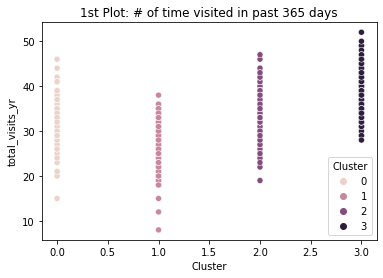

In [12]:
import seaborn as sns
sns.scatterplot(data = rfm, x = 'Cluster' , y = 'total_visits_yr', hue='Cluster').set(title='1st Plot: # of time visited in past 365 days')

Description: 

As we set at first, there are 4 clusters in total. In terms of the number of times that the person visited online store in the past 365 days, Cluster 0 has the lowest number of times, while Cluster 3 visited the most, and Cluster 1 and 3 fall in the middle range.

[Text(0.5, 1.0, '2nd Plot: # of payments in past 365 days')]

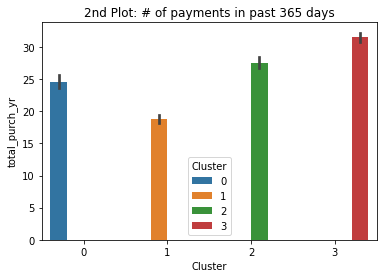

In [13]:
sns.barplot(data = rfm, x = 'Cluster' , y = 'total_purch_yr', hue='Cluster').set(title='2nd Plot: # of payments in past 365 days')

Description: 

In terms of the number of times the person purchased in the past 365 days, we can see Cluster 0 has the lowest times of payment, while Cluster 3 make the most times payment, and Cluster 1 and 3 fall in the middle range, which are along with their lowest visit times.

[Text(0.5, 1.0, '3rd Plot: $ spent in past 365 days')]

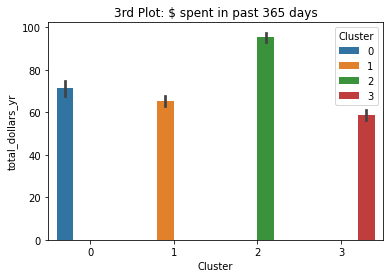

In [14]:
sns.barplot(data = rfm, x = "Cluster", y = 'total_dollars_yr', hue='Cluster').set(title='3rd Plot: $ spent in past 365 days')

Description: 

The barplot depicts each cluster in terms of the total dollars the person spent in the past 365 days. We can see that Cluster 3 contributes the least to the total revenue of the online store although it makes the most times payment, and Cluster 1 contributes the most to the total revenue even if it just has an average time of purchase.

[Text(0.5, 1.0, '4th Plot: days_since_sitevisit')]

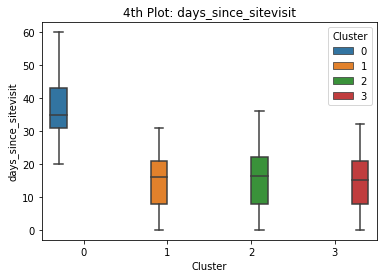

In [15]:
sns.boxplot(data = rfm, x = "Cluster", y = 'days_since_sitevisit', hue='Cluster').set(title='4th Plot: days_since_sitevisit')

Description: 

The boxplot depicts each cluster in terms of the number of days that have elapsed since the customer last visited the online store. We can see that only Cluster 2 has a significant difference which means this group of people leaves the longest, while the other groups are almost at the same level.

### J. Give a descriptive name to each one of your clusters, along with a few sentences of explanation for the name that you chose. 

As you describe each segment,
think about the types of customers likely to belong to each group. For each cluster, also include a couple sentences about targeting. How can Lobster Land reach this group, specifically?

Answer: 

For Cluster 0, I would like to call it "Nonpay". Since these people visit the online store least with little pay. To target these people, we can send a rewarding survey to reach out the reasons why they are not like visiting and spending in our online store and upgrade our website and rewarding strategies to target these people.


For Cluster 1, I named it "Cashcow". Since these people are willing to pay and to pay large sums in the online store, although they are not the people who visit the online store most. To activate these people to pay more, I recommend sending them **Full Discount Coupons**. Also, we can send them the most updated products regularly and interact closely with them which can persuade them to pay more subconsciously.

For Cluster 2, I named it "Opportunity". Since this group of people performs well on both the 'total_dollars_yr' and 'total_purch_yr' aspects, they are the group that has not visited the online store the longest. To target this group, I recommend to sent some **Free Shipping Coupons** with some words of sincere greeting to show our courtesy. The reason why I prefer Free shipping Coupons is that compared to Cluster 1, they are less inclined to spend large sums.


For Cluster 3, I named it "Scrooge". Since they visit the online store most and make the most times of payments but the total dollars are the least. It turns out that they are only willing to pay for the cheap stuff. For these people, I recommend increasing the frequency of sending **1 item deal coupons**. With a large discount, they will be willing to pay for the goods at a higher price. And in this way, they may develop their spending habits on high consumption.

#  Part II: Conjoint Analysis with a Linear Model

### A. Read the dataset haunted_hayride.csv into your local environment in Jupyter Notebook.

In [16]:
dt = pd.read_csv("haunted_hayride.csv") 
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bundleID         864 non-null    int64  
 1   paxpercar        864 non-null    int64  
 2   total_dark_time  864 non-null    int64  
 3   flashing_lights  864 non-null    object 
 4   theme            864 non-null    object 
 5   total_time       864 non-null    int64  
 6   ghost_touch      864 non-null    object 
 7   no_phone_zone    864 non-null    object 
 8   avg_rating       864 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 60.9+ KB


### B. Based on the descriptions shown above, which of your variables are numeric, and which are categorical?

Answer: 'bundleID', 'avg_rating' are numeric variables, while the others are categorical ones. Although the datatype of 'paxpercar', 'total_dark_time' are int64, the number does not have valid mathematical meaning, these variables still belong to categorical. 

### C. After first removing the bundleID variable, use the pandas get_dummies() function in order to prepare the remaining variables for use in a linear model. 

Inside this function, include this argument: drop_first = True. Doing this will save us from
the multicollinearity problem that would make our model unreliable. Be sure to
dummify ALL of your input variables, even the numeric ones.



In [17]:
dt.columns
dt.drop("bundleID", axis=1, inplace=True)

In [18]:
dt_dummy = pd.get_dummies(dt, drop_first=True, columns=['paxpercar', 'total_dark_time', 'flashing_lights', 'theme',
       'total_time', 'ghost_touch', 'no_phone_zone'])
dt_dummy.head()

,avg_rating,paxpercar_8,paxpercar_12,total_dark_time_7,total_dark_time_12,flashing_lights_Yes,theme_Pumpkin_Terror,theme_Vampire,theme_Zombie Apocalypse,total_time_240,total_time_420,ghost_touch_Yes,no_phone_zone_Yes
0,5.455046,0,0,0,0,1,1,0,0,0,0,1,1
1,4.354482,0,0,0,0,1,1,0,0,0,0,1,0
2,5.186594,0,0,0,0,1,1,0,0,0,0,0,1
3,9.282721,0,0,0,0,1,1,0,0,0,0,0,0
4,5.205072,0,0,0,0,1,1,0,0,1,0,1,1


a. Why should the numeric input variables based on this survey data be
dummified?

Answer: If we provide respondents with every specific bundle to choose from, we have (# of levels of freature1) * (# of levels of freature1)* (# of levels of freature3)... in total to consider. To avoid this complex computation, we can ask them to choose different features(variables) and then apply Conjoint Analysis to build a linear regression model. So dummified variables for ratings-based/metric-based Conjoint Analysis are necessary.

### D.Build a linear model with your data, using the average rating as the outcome variable, and with all of your other variables as inputs.

In [19]:
dt_dummy.columns

Index(['avg_rating', 'paxpercar_8', 'paxpercar_12', 'total_dark_time_7',
       'total_dark_time_12', 'flashing_lights_Yes', 'theme_Pumpkin_Terror',
       'theme_Vampire', 'theme_Zombie Apocalypse', 'total_time_240',
       'total_time_420', 'ghost_touch_Yes', 'no_phone_zone_Yes'],
      dtype='object')

In [20]:
X = dt_dummy[['paxpercar_8', 'paxpercar_12', 'total_dark_time_7',
       'total_dark_time_12', 'flashing_lights_Yes', 'theme_Pumpkin_Terror',
       'theme_Vampire', 'theme_Zombie Apocalypse', 'total_time_240',
       'total_time_420', 'ghost_touch_Yes', 'no_phone_zone_Yes']]
y = dt_dummy['avg_rating']
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

### E. Display the coefficient values of your model inputs.

In [21]:
regressor.intercept_

5.896481750848408

In [22]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
paxpercar_8,-0.670634
paxpercar_12,-0.254146
total_dark_time_7,-0.135522
total_dark_time_12,-0.704311
flashing_lights_Yes,0.765746
theme_Pumpkin_Terror,0.281009
theme_Vampire,1.065442
theme_Zombie Apocalypse,0.370184
total_time_240,0.723643
total_time_420,0.116849


### F. Now, deliver some paragraphs of analysis for Lobster Land management about what your model is showing you.

Answer: Based on the result of regression, we can see that:

(1)People prefer only 4 people on the ride at once, and there is an obvious jump turning to 8 passengers per car. However, considering the operating costs, I think 8 passengers is not a bad choice. Since it is reasonable that people prefer private journeys with their friends, but it is also acceptable if there is another group of people. The premise is that no one is taken apart.

(2)no period of the ride in the dark is the most popular choice, but the gap between 7 seconds of dark and non-dark is small. If the electricity is a huge cost, I think a 7-seconds dark journey is acceptable. If not, just apply the non-dark plan.

(3)haunted hayride with flashing lights is a more popular choice, so I recommend adding this function.

(4)People prefer the Vampire theme the most, while Pumpkin_Terror and Zombie Apocalypse themes are almost at the same level of popularity. To give visitors more choices to experience, I recommend producing two themes, the Vampire theme responding to the result of the survey, another is Pumpkin_Terror theme which response to the season. And there may be a bias among respondents, Pumplin_Terror theme may preferable for children who are the other main parts of visitors but do not involve in the surveys.

(5)The entire journey finished in 240 seconds without ghost touch and not required to drop the phones is preferable, so I recommend these options without more discussion.

# Wildcard: Marketing & Segments

A. Find ANY advertisement…ANYWHERE. As you walk around in your daily life, you
might look for an ad on the side of the T, on a bus stop, on a poster, etc. Alternatively, you could use an advertisement that you encounter while browsing the web.


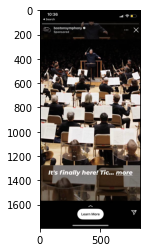

In [23]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('ad.jpg')
plt.imshow(img)

Answer: This ad is sponsered by Boston Symphony, which appears when I swipe on the ins story. Based on the common cluster types, I think the ad is targeting people who are adult who can keep quiet in the whole process and appreciate the symphony, and who is interested and also willing to pay for arts. I think I am in the segment. My Spotify often plays symphony when I am studying or reading, I think it can calm me down and help me focus on studying and detect the time past at the same time. And I also often view some online shops for museum souvenirs and follow some illustrators and musicians. Maybe ins also detect I bought a music opera ticket called Hairspray recently.